## Исследование данных о российском кинопрокате



### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import warnings # убрать предупреждения

In [2]:
df_shows=pd.read_csv('datasets/mkrf_shows.csv')
df_movies=pd.read_csv('datasets/mkrf_movies.csv')

In [3]:
warnings.filterwarnings("ignore") #чтобы было красиво)

In [4]:
df_shows.head(5)

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [5]:
df_shows.shape #посмотрим размер перед соединением датафреймов

(3158, 2)

In [6]:
df_movies.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [7]:
df_movies.shape # посмотрим размер

(7486, 15)

после объединения должно получится 7486 строк

In [8]:
df_movies['puNumber']=df_movies['puNumber'].fillna(0) 
#заполним 0 чтобы можно было объединить

df_movies.loc[df_movies['puNumber']=="нет",'puNumber']= 0 
#заполним как "нет", чтобы можно было объединить

df_movies['puNumber']=df_movies['puNumber'].astype('int') 
#приведём к целому

df=df_shows.merge(df_movies,on = 'puNumber', how = 'right') 
#с этим будет работать

size_before=df.shape 
#запомним размер перед предобработкой чтобы потом сравнить изменения

df.head(5)#посмотрим что получилось


,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,221048915,NaN,Открытый простор,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,111013716,NaN,Особо важное задание,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,221038416,NaN,Особо опасен,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,221026916,NaN,Особо опасен,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,221030815,NaN,Особо опасен,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   puNumber               7486 non-null   int64  
 1   box_office             3158 non-null   float64
 2   title                  7486 non-null   object 
 3   show_start_date        7486 non-null   object 
 4   type                   7486 non-null   object 
 5   film_studio            7468 non-null   object 
 6   production_country     7484 non-null   object 
 7   director               7477 non-null   object 
 8   producer               6918 non-null   object 
 9   age_restriction        7486 non-null   object 
 10  refundable_support     332 non-null    float64
 11  nonrefundable_support  332 non-null    float64
 12  budget                 332 non-null    float64
 13  financing_source       332 non-null    object 
 14  ratings                6519 non-null   object 
 15  genr

количество строк совпадает. все данные из movies вошли

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [10]:
df.columns=df.columns.str.lower() # стандартная процедура
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   punumber               7486 non-null   int64  
 1   box_office             3158 non-null   float64
 2   title                  7486 non-null   object 
 3   show_start_date        7486 non-null   object 
 4   type                   7486 non-null   object 
 5   film_studio            7468 non-null   object 
 6   production_country     7484 non-null   object 
 7   director               7477 non-null   object 
 8   producer               6918 non-null   object 
 9   age_restriction        7486 non-null   object 
 10  refundable_support     332 non-null    float64
 11  nonrefundable_support  332 non-null    float64
 12  budget                 332 non-null    float64
 13  financing_source       332 non-null    object 
 14  ratings                6519 non-null   object 
 15  genr

преобразуем время во временной формат

In [11]:
df['show_start_date']=pd.to_datetime(df['show_start_date'],format = '%Y-%m-%dT%H:%M:%S')  #преобразуем во временной формат

преобразуем рейтинг в float

In [12]:
def rating_correct(df):
    rating=df['ratings']
    try:
        if isinstance(rating, str) and float(rating.replace('%',''))>10 and rating != 'empty':
            return float(rating.replace('%',''))/10
        else:
            return rating
    except:
        pass

df['ratings']=df.apply(rating_correct,axis=1) #испольлзуем функцию чтобы потом привести к числовому формату
df['ratings']=df['ratings'].fillna(0)
df['ratings']=df['ratings'].astype('float')

In [13]:
df['genres']=df['genres'].fillna('отсуствует')
df['genres']=df['genres'].astype('str')

In [14]:
df['genres'].describe()

count           7486
unique           743
top       отсуствует
freq             976
Name: genres, dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   punumber               7486 non-null   int64              
 1   box_office             3158 non-null   float64            
 2   title                  7486 non-null   object             
 3   show_start_date        7486 non-null   datetime64[ns, UTC]
 4   type                   7486 non-null   object             
 5   film_studio            7468 non-null   object             
 6   production_country     7484 non-null   object             
 7   director               7477 non-null   object             
 8   producer               6918 non-null   object             
 9   age_restriction        7486 non-null   object             
 10  refundable_support     332 non-null    float64            
 11  nonrefundable_support  332 non-null    float64          

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [16]:
df.isna().sum() 

punumber                    0
box_office               4328
title                       0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                     0
genres                      0
dtype: int64

box_office               4328- пропуски после соединения датафреймов. В movies не было информации по сборам. есди заполним нулями, то потом можно будет отбросить
<br>-film_studio                 18 - не указана студия, можно оставить, ничего страшного, всё равно там строки
<br>-production_country          2 - не указана страна, можно оставить, ничего страшного, всё равно там строки
<br>-director                    9 - не указан режиссер, можно оставить, ничего страшного, всё равно там строки
<br>-producer                  568 - не указан продюссер, можно оставить, ничего страшного возможно продюсера и вправду не было, всё равно там строки
<br>-refundable_support       7154 - объём возвратных средств государственной поддержки; можно заполнить нулями
<br>-nonrefundable_support    7154 - объём невозвратных средств государственной поддержки; можно заполнить нулями
<br>-budget                   7154 - общий бюджет фильма; 
<br>-financing_source         7154 - источник государственного финансирования; 
<br>-ratings                   0 - рейтинг фильма мы уже обрабатывали этот столбец и заполнили нулями,
<br>-genres                    249 - жанр фильма; уже обработали и заполнили пропуски как "отсутсвует"

In [17]:
df['film_studio']=df['film_studio'].fillna('не указан')
df['production_country']=df['production_country'].fillna('не указана')
df['director']=df['director'].fillna('не указан')
df['producer']=df['producer'].fillna('не указан')
df['genres']=df['genres'].fillna('не указан')

In [18]:
df.isna().sum() 

punumber                    0
box_office               4328
title                       0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                     0
genres                      0
dtype: int64

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [19]:
for column in df.columns:
    print(f'  {column} - {df[column].duplicated().sum()}')

  punumber - 2
  box_office - 4547
  title - 714
  show_start_date - 5521
  type - 7478
  film_studio - 1995
  production_country - 6535
  director - 2674
  producer - 2136
  age_restriction - 7481
  refundable_support - 7451
  nonrefundable_support - 7410
  budget - 7195
  financing_source - 7482
  ratings - 7401
  genres - 6743


  punumber - 2, дубликаты прокатных удостоверений, нужно убрать. но их очень мало
  <br>box_office - 4547, у каких то фильмов данные по кассовым сборам часто округляются до крупных сумм, + пропуски из-за отсутствия информации в movies по кассовым сборам
  <br>**title** - 714, одинаковые названия, есть одинаковые фильмы, но при этом разные номера прокатных удостоверений.
  прокатные удостоверения выдаются для разных видов проката: прокат в кино, театральный, blu-ray, телевидение.
  Но нам интересна информация по прокату в кино, ведь мы соединяем данные о прокатных удостоверениях и  данные о прокате в российских кинотеатрах.
  
  
  <br>show_start_date - 5521, совпала дата релиза. подозрительно много совпадений
  <br>type - 7478, типы совпадают, это нормально. категориальные значения
  <br>film_studio - 1995,  студии выпускают не по одному фильму, + присутствуют дубликаты
  <br>production_country - 2576, скорее всего множество фильмов из России
  <br>director - 664, режиссёры снимают по несколько фильмов,  + присутствуют дубликаты
  <br>producer - 432, продюссеры тоже участвуют, + есть одинаковые фильмы в датафрейме
  <br>age_restriction - 3153, категориальные занчения
  <br>refundable_support - 7451, там где отсутствует значение, значит 0 рублей
  <br>nonrefundable_support - 7410 там где отсутствует значение, значит 0 рублей
  <br>budget - 7195 бюджет закладывается крупными суммами, видимо часто совпадают, + есть одинаковые фильмы в датафрейме
  <br>financing_source - 3154, категориальные значения
  <br>ratings - 3072, категориальные значения
  <br>genres - 2609, категориальные значения

In [20]:
df_all=df
# df = df.drop_duplicates(subset=['title'], keep='first').reset_index(drop=True)

In [21]:
for column in df.columns:
    print(f'  {column} - {df[column].duplicated().sum()}')

  punumber - 2
  box_office - 4547
  title - 714
  show_start_date - 5521
  type - 7478
  film_studio - 1995
  production_country - 6535
  director - 2674
  producer - 2136
  age_restriction - 7481
  refundable_support - 7451
  nonrefundable_support - 7410
  budget - 7195
  financing_source - 7482
  ratings - 7401
  genres - 6743


#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

##### type

In [22]:
problem_columns=['type']
for column in problem_columns:
    print(f'  {column} - {df[column].unique()} \n')    

  type - ['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' ' Художественный' ' Анимационный'
 'Музыкально-развлекательный'] 



In [23]:
df['type']=df['type'].str.strip()

##### genres

В столбце 'genres' есть множество повторяющихся значений. Дело в том что указывается основной жанр, а потом по убывающей по степени отношения фильма к определенному жанру. На всяких случай отсортируем и добавим новый столбец, для того чтобы поискать закономерности по кассовым сборам и рейтингу при наличии определенного жанра.

In [24]:
def sort_type(df): #сортируем и добавляем новый столбец
    string=df['genres']
    try:
        return ','.join(sorted(string.split(',')))
    except:
        pass
    
df['genres_sorted']=df.apply(sort_type,axis=1)

##### title

In [25]:
df['title']=df['title'].str.strip()

##### production_country

In [26]:
problem_columns=['production_country']
for column in problem_columns:
    print(f'  {column} - {df[column].unique()} \n')  

  production_country - ['США' 'СССР' 'Франция' 'СССР, Венгрия' 'Германия-Великобритания'
 'Великобритания - Италия' 'Чехословакия' 'США - Франция - Турция'
 'Новая Зеландия' 'Канада - Франция - Испания' 'США-Германия'
 'США - Великобритания' 'Великобритания' 'США - Германия'
 'Франция - Мексика - США' 'Россия, Казахстан, США' 'СССР, Швеция'
 'СССР, Франция, Англия, Куба, ГДР' 'Германия'
 'Великобритания-США-Германия-КНР' 'СССР, ЧССР, Западный Берлин, ПНР'
 'СССР, Италия' 'Гонконг, КНР' 'США - Франция'
 'США - Япония - Франция - Великобритания'
 'Гонконг - Сингапур - Таиланд - Великобритания' 'США-Канада'
 'Франция - Италия - Великобритания - США' 'Франция - США'
 'Ирландия-Великобритания-Германия' 'Чехия' 'США-Австралия'
 'СССР, Финляндия' 'США-Франция-Великобритания-Австрия' 'США - Бельгия'
 'США - Ирландия - Великобритания' 'Великобритания - США'
 'Люксембург - Нидерланды - Испания - Великобритания - США - Италия'
 'Великобритания - Франция - США' 'Новая Зеландия - США'
 'США - Велик

In [27]:
df['production_country']=( #исправляем проблему в столбце 'production_country'
    df['production_country'].
    str.replace(' - ',', ').
    str.replace('-',', ')
)

##### age_restriction

In [28]:
problem_columns=['age_restriction']
for column in problem_columns:
    print(f'  {column} - {df[column].unique()} \n')  

  age_restriction - ['«18+» - запрещено для детей' '«6+» - для детей старше 6 лет'
 '«12+» - для детей старше 12 лет' '«16+» - для детей старше 16 лет'
 '«0+» - для любой зрительской аудитории'] 



In [29]:
df['age_restriction']=( 
    df['age_restriction'].
    str.replace(' - для детей старше 16 лет','').
    str.replace(' - для любой зрительской аудитории','').
    str.replace(' - для детей старше 12 лет','').
    str.replace(' - для детей старше 6 лет','').
    str.replace(' - запрещено для детей','')
)

In [30]:
problem_columns=['age_restriction']
# problem_columns=['director','type','age_restriction','financing_source','genres','production_country']
for column in problem_columns:
    print(f'  {column} - {df[column].unique()} \n')  

  age_restriction - ['«18+»' '«6+»' '«12+»' '«16+»' '«0+»'] 



#### Шаг 2.5. Проверка количественных значений


столбцы с количественными значениями 'box_office','refundable_support','nonrefundable_support','budget','ratings'

##### box_office

<AxesSubplot:>

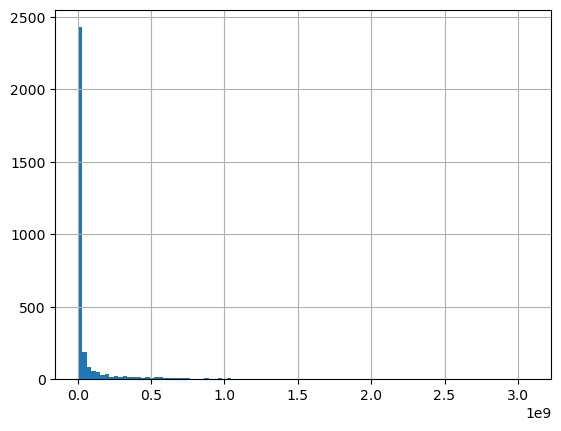

In [31]:
df['box_office'].hist(bins=100)

видим аномалию около нуля, рассмотрим поближе

<AxesSubplot:>

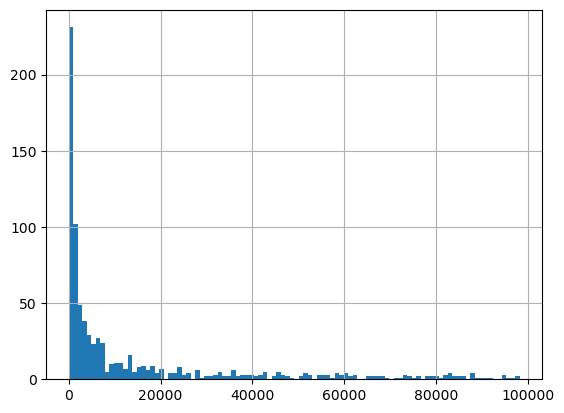

In [32]:
df_temp1=df.query('box_office<0.1e6')
df_temp1['box_office'].hist(bins=100)

видно что есть множество фильмов со сборами менее 10000 и их аномально много. В принципе у фильма не может быть насколько малый бюджет. Лучше отбросим эти данные в дальнейшем при исследовании

##### budget

In [33]:
df['budget'].describe()

count    3.320000e+02
mean     1.272297e+08
std      1.885883e+08
min      0.000000e+00
25%      4.200000e+07
50%      6.864992e+07
75%      1.419853e+08
max      2.305074e+09
Name: budget, dtype: float64

<AxesSubplot:>

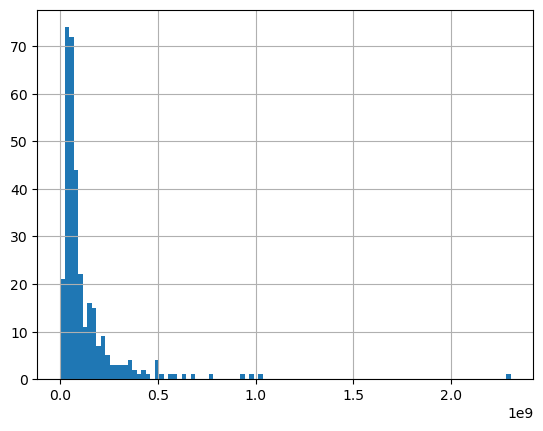

In [34]:
df['budget'].hist(bins=100)

<AxesSubplot:>

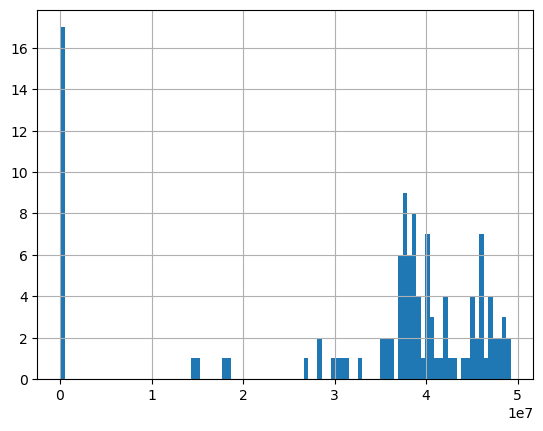

In [35]:
df_temp2=df.query('budget<0.5e8')
df_temp2['budget'].hist(bins=100)

виден пик около нуля, лучше отбросить нулевой бюджет

##### 'refundable_support','nonrefundable_support'

<AxesSubplot:>

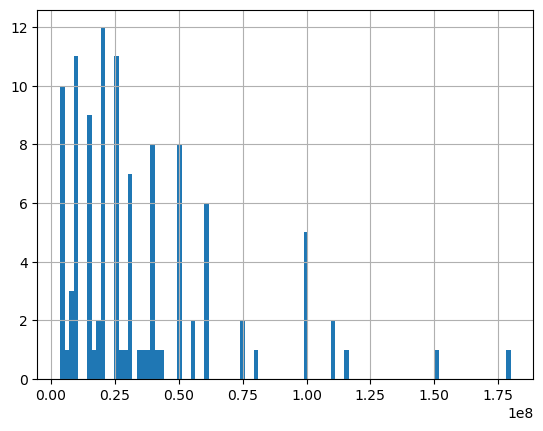

In [36]:
df_temp3=df.query('1e9>refundable_support>0')
df_temp3['refundable_support'].hist(bins=100)

видно что объем возвратной поддержки часто совпадает, скорее всего согласовывают определенные заранее одинаковые суммы денег, поэтому распределение имеет такой вид

<AxesSubplot:>

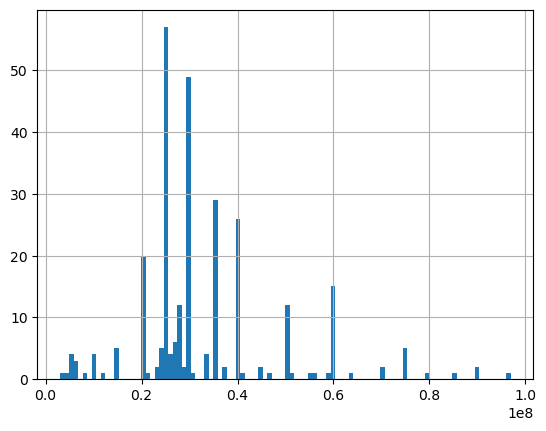

In [37]:
df_temp3=df.query('1e8>nonrefundable_support>0')
df_temp3['nonrefundable_support'].hist(bins=100)

видно что объем невозвратной поддержки часто совпадает, скорее всего согласовывают также определенные заранее одинаковые суммы денег (20, 25, 30, 35 млн руб и т.д.) как и в случае возвратной поддержки

**Выводы**:

1. отбросили фильмы с указанными аномально малыми бюджетами
2. отбросили фильмы с нулевым бюджетом
3. Не учитываем фильмы без рейтинга при анализе рейтингов 

#### Шаг 2.6. Добавление синтетических данных

- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

##### год проката

In [38]:
df['show_start_year']=df['show_start_date'].dt.year

##### режиссёр и основной жанр

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [39]:
def first_director(df):
    string=df['director']
    try:
        arr1=string.split(',')
        return arr1[0]
    except:
        pass

def first_genre(df):
    string=df['genres']
    try:
        arr1=string.split(',')
        return arr1[0]
    except:
        pass
    
df['first_director']=df.apply(first_director,axis = 1)    
df['first_genre']=df.apply(first_genre,axis = 1) 

##### доля господдержки

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [40]:
def rate_budget(df):
    budget=df['budget']
    ref_supp=df['refundable_support']
    non_ref_supp=df['nonrefundable_support']
    try:
        if budget>0 and (ref_supp>0 or non_ref_supp>0):
            return (ref_supp+non_ref_supp)/budget
    except:
        pass
df['gov_fin_rate']=df.apply(rate_budget, axis=1) 

#### Итоги предобработки

преобразовали дату премьеры во временной формат
преобразовали рейтинг во формат с плавающей запятой

заполнили пропуски в основном у строковых значений как "не указано"

исправили проблемы в type, genres, title, production country.
сократили age_restriction

обнаружены аномально малые кассовые сборы менее 10000, в дальнейшем это надо учесть

обнаружены нулевые бюджеты, в дальнейшем так же это надо учесть

добавили год проката, основного режиссера и основной жанр
так же рассчитали долю господдержки относительно общего бюджета фильма

### Шаг 3. Исследовательский анализ данных


#### Прокат фильмов

- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

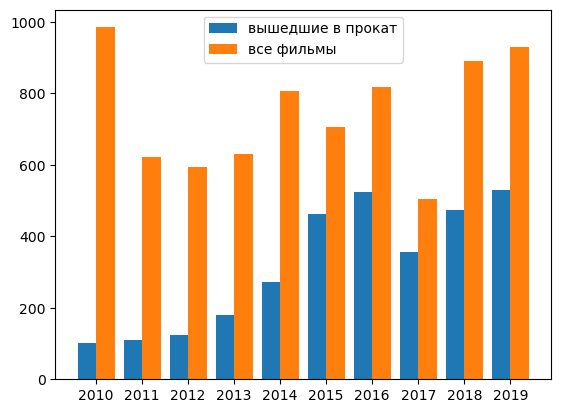

In [41]:
df_with_box=df.query('box_office>0')
df_with_box_by_year_pivot=df_with_box.pivot_table(index='show_start_year', values = 'title', aggfunc= 'count')
# df_year_all_pivot=df_all.pivot_table(index='show_start_year', values = 'punumber', aggfunc= 'count')
df_all_by_year_pivot=df.pivot_table(index='show_start_year', values = 'title', aggfunc= 'count')
# df_with_box_by_year_pivot
X_axis = np.arange(len(df_all_by_year_pivot))
  
plt.bar(X_axis - 0.2, df_with_box_by_year_pivot['title'], 0.4, label = 'вышедшие в прокат')
plt.bar(X_axis + 0.2, df_all_by_year_pivot['title'], 0.4, label = 'все фильмы ')
  
plt.xticks(X_axis, df_all_by_year_pivot.index)

plt.legend()

plt.show()


In [42]:
df_with_box['show_start_year'].sum()/df['show_start_year'].sum()

0.41892098878793355

доля вышедших в прокат (с указанным прокатным удостоверением) составляет 44% от общего числа. 

Так же виден кинокризис 2017 года, фильмов выходило меньше в этот год. До 2015 года говорить сложно, так как в базе данных минкульта данные до 2015г скорее всего не полностью заполнены 

#### Суммы сборов

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

исследуем данные по сбору

избавимся от аномально малых прокатов и аномально больших

In [43]:
df_good_box=df.query('1e8>box_office>10000')

(0.0, 150000000.0)

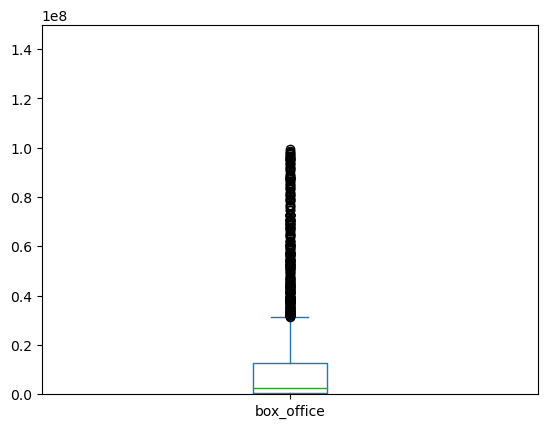

In [44]:
df_good_box['box_office'].plot(kind='box')
plt.ylim(0,0.15e9)

<AxesSubplot:xlabel='show_start_year'>

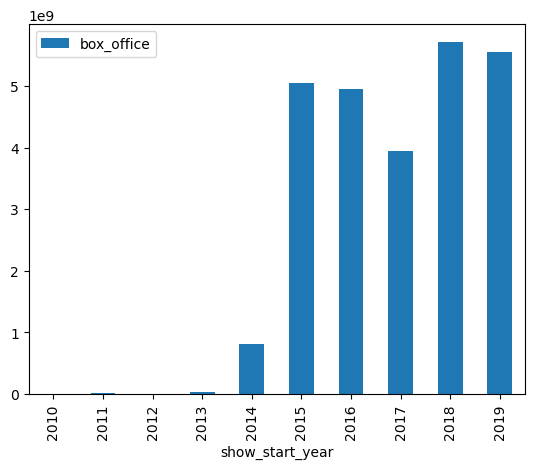

In [45]:
df_box_by_year_pivot_sum=df_good_box.pivot_table(index='show_start_year', values = 'box_office', aggfunc= 'sum')
df_box_by_year_pivot_sum.columns
df_box_by_year_pivot_sum.plot(kind='bar')

Видно что данные до 2015 портят всю картину

In [46]:
df_after_2015=df.query('show_start_year>=2015')

<AxesSubplot:xlabel='show_start_year'>

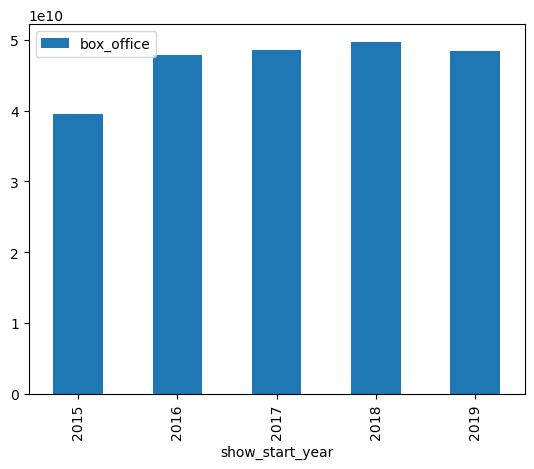

In [47]:
df_box_by_year_pivot_sum=df_after_2015.pivot_table(index='show_start_year', values = 'box_office', aggfunc= 'sum')
df_box_by_year_pivot_sum.columns
df_box_by_year_pivot_sum.plot(kind='bar')

In [48]:
df_box_by_year_pivot_sum

,box_office
show_start_year,
2015,3.949737e+10
2016,4.786630e+10
2017,4.856371e+10
2018,4.966840e+10
2019,4.842571e+10


в 2017 были максимальные кассовые сборы, хотя и фильмов вышло меньше. 2019 год по сумме сборов практически равен 2017 году.
в 2015 были минимальные кассовые сборы. На суммарные кассовые сборы сильно влияют хиты с большими кассовыми сборами

#### Медианная и средняя суммы сборов за год

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [49]:
df_good_box_by_year_pivot=df_good_box.pivot_table(index='show_start_year', values = 'box_office', aggfunc= ['median','mean'])

In [50]:
df_good_box_by_year_pivot

,median,mean
,box_office,box_office
show_start_year,,
2010,23612.500,1.137385e+05
2011,42691.000,5.140280e+05
2012,30607.500,1.355303e+05
2013,33500.000,5.001656e+05
2014,245772.500,5.452226e+06
2015,3654528.510,1.401344e+07
2016,2328755.555,1.195857e+07
2017,5517854.000,1.424133e+07


<function matplotlib.pyplot.show(close=None, block=None)>

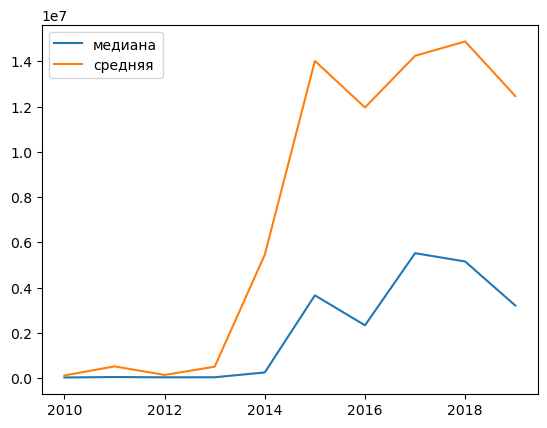

In [51]:
plt.plot(df_good_box_by_year_pivot[('median', 'box_office')], label ='медиана')
plt.plot(df_good_box_by_year_pivot[('mean', 'box_office')], label ='средняя')
plt.legend()
plt.show

In [52]:
df_good_box_by_year_pivot

,median,mean
,box_office,box_office
show_start_year,,
2010,23612.500,1.137385e+05
2011,42691.000,5.140280e+05
2012,30607.500,1.355303e+05
2013,33500.000,5.001656e+05
2014,245772.500,5.452226e+06
2015,3654528.510,1.401344e+07
2016,2328755.555,1.195857e+07
2017,5517854.000,1.424133e+07


медиана заметно ниже средней, что более верно характеризует средний заработок в прокатах. можно сказать что средний заработок фильм в прокате - от 12 до 15 млн рублей, а медианный  от 1 до 6 млн рублей 

в 2017 году средний прокат был минимальный. Видимо изза кинокризиса, появления онлайн-кинотеатров

#### Влияние возрастного ограничения

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

<AxesSubplot:xlabel='age_restriction'>

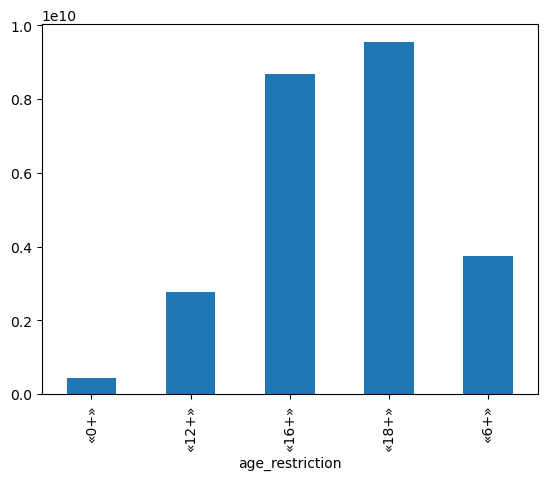

In [53]:
df_2015_to_2019=df_good_box.query('2019>=show_start_year>=2015')
df_2015_to_2019_pivot=df_2015_to_2019.pivot_table (index=['show_start_year','age_restriction'], values='box_office',aggfunc='sum')
df_2015_to_2019_pivot=df_2015_to_2019_pivot.reset_index()
df_2015_to_2019_pivot_grouped=df_2015_to_2019_pivot.groupby('age_restriction')['box_office'].sum()
df_2015_to_2019_pivot_grouped.plot(kind='bar')

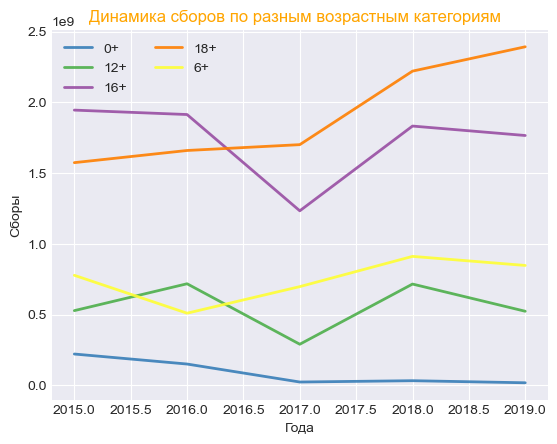

In [54]:
df_2015_to_2019_by_year=df_2015_to_2019.pivot_table (index='show_start_year',columns='age_restriction', values='box_office',aggfunc='sum')
df_2015_to_2019_by_year.columns=['0+','12+','16+','18+','6+']
# df_2015_to_2019_by_year.reset_index()

df_2015_to_2019_by_year_resetted=df_2015_to_2019_by_year.reset_index()
# Change the style of plot

plt.style.use('seaborn-darkgrid')
 
# Create a color palette
palette = plt.get_cmap('Set1')
 
# plot multiple lines
num=0
for column in df_2015_to_2019_by_year_resetted.drop('show_start_year', axis=1):
    num+=1
    plt.plot(df_2015_to_2019_by_year_resetted['show_start_year'],
             df_2015_to_2019_by_year_resetted[column], marker='', 
             color=palette(num), linewidth=2, alpha=0.9, label=column)

# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.title("        Динамика сборов по разным возрастным категориям", 
          loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Года")
plt.ylabel("Сборы")

# Show the graph
plt.show()

Выводы делаются без учёта аутсайдеров.

Суммарно больше всех собрали фильмы с категорией 16+, за ними следует категория 12+, затем 6+. 

А к началу 2019 года сборы у категорий 6+, даже превысили сборы у категории 16+, а у фильмов с категорией 16+ сравнялись с категорией 16+.

Фильмы с категорией 18+ в 2018 году даже обошли другие категории, но в среднем они зарабатывают меньше.

Так же заметно общее падение  суммы сборов у всех категорий в 2017, связанное с кинокризисом


#### Фильмы с каким возрастным ограничением собрали больше всего денег в прокате?

тут рассмотрим все фильмы, в том числе и с аномально большим прокатом

In [55]:
top_10=(
    df.pivot_table(index = ['title','age_restriction'], values = 'box_office',aggfunc = 'max').
    sort_values(by='box_office',ascending = False).head(10)
)

top_10

,,box_office
title,age_restriction,
Холоп,«12+»,3.073569e+09
Движение вверх,«6+»,2.779686e+09
Мстители: Финал,«16+»,2.576614e+09
Т-34,«12+»,2.271754e+09
Пираты Карибского моря: Мертвецы не рассказывают сказки,«16+»,2.118396e+09
Зверополис,«6+»,2.048126e+09
Тайная жизнь домашних животных. Миньоны против газона,«6+»,1.971005e+09
Веном,«16+»,1.913258e+09
Малефисента: Владычица тьмы,«6+»,1.911945e+09


максимум это 12+, 6+, 16+,12+,16+,6+

### Шаг 4.Фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

также введём критерий окупаемость **payback**: разница между кассовыми сборами и бюджетом фильма

In [56]:
df['payback']=df['box_office']-df['budget']

выделим фильмы с господдержкой

In [57]:
gos_fin_df=df.query('gov_fin_rate>0 and production_country.str.contains("Россия") == True') #выделим фильмы с господдержкой

In [58]:
gos_fin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 1281 to 7478
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   punumber               315 non-null    int64              
 1   box_office             301 non-null    float64            
 2   title                  315 non-null    object             
 3   show_start_date        315 non-null    datetime64[ns, UTC]
 4   type                   315 non-null    object             
 5   film_studio            315 non-null    object             
 6   production_country     315 non-null    object             
 7   director               315 non-null    object             
 8   producer               315 non-null    object             
 9   age_restriction        315 non-null    object             
 10  refundable_support     315 non-null    float64            
 11  nonrefundable_support  315 non-null    float64        

всего 312 фильмов с господдержкой

#### Сколько средств выделяют на господдержку

<AxesSubplot:xlabel='show_start_year'>

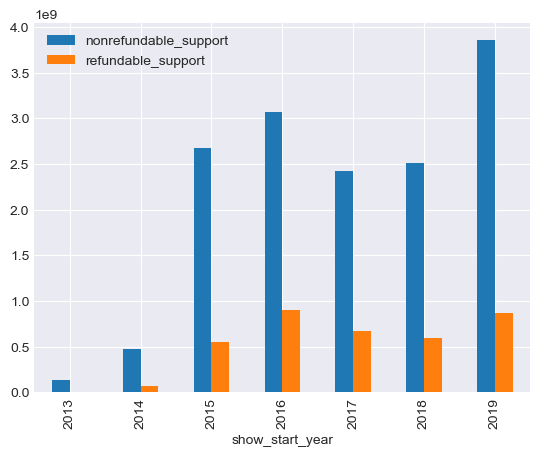

In [59]:
gos_support_pivot=( 
    gos_fin_df.pivot_table(index = 'show_start_year', values=['refundable_support','nonrefundable_support'], aggfunc='sum')
)
gos_support_pivot.plot(kind='bar')

видно что в среднем выделяется около 350 млн руб в год  в сумме на поддержку кино

<div class="alert alert-info">
<b>воспользуемся этой штучкой)</b> 
</div>

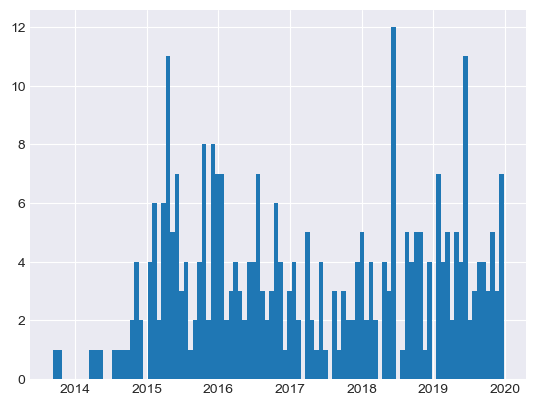

In [60]:
gos_fin_df['show_start_date'].hist(bins=100)
# gos_fin_df['big_gov_budget_rate']=round(gos_fin_df['gov_fin_rate'], 2)
gos_fin_df.loc[:,'big_gov_budget_rate']=round(gos_fin_df['gov_fin_rate'], 2)  ## укрупним группы по уровню господдержки до сотых

#### Рейтинг фильмов с господдержкой

<AxesSubplot:xlabel='big_gov_budget_rate'>

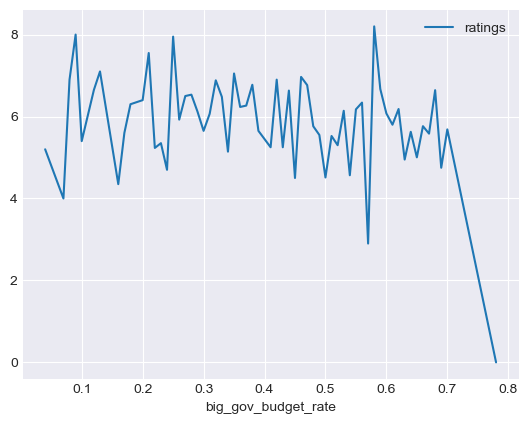

In [61]:
gos_fin_df_ratings_pivot=gos_fin_df.pivot_table(index='big_gov_budget_rate', values='ratings', aggfunc='mean')
gos_fin_df_ratings_pivot.plot()

 видно что фильмы с долей с господдержки от 0.05 до 0.7 имеют рейтинг от 4 до 8, а после 0.7 рейтинг фильмов уже падает до нуля. 
 Видимо для такого спонсорского кино уже не важен рейтинг и особого коммерческого интереса в этом плане нет. Главное чтобы фильм был снят и вышел

#### Господдержка и окупаемость

<AxesSubplot:xlabel='show_start_year'>

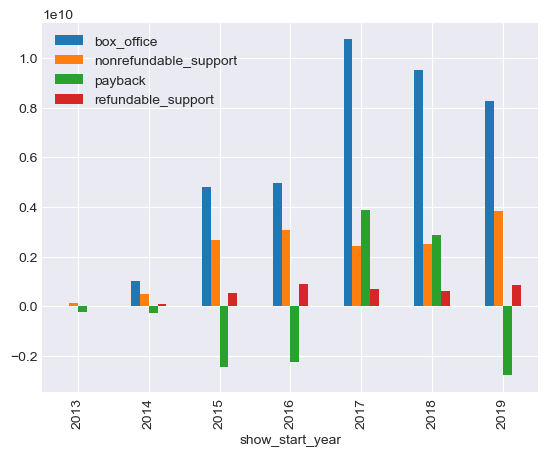

In [62]:
gos_fin_df_groupped=gos_fin_df.pivot_table(index='show_start_year', values = ['refundable_support','nonrefundable_support','box_office','payback'], aggfunc= 'sum')#.hist(bins=30)
gos_fin_df_groupped.plot(kind='bar')

введём категорию окупился фильм или нет

In [63]:
def payback_category(data):
    payback=data['payback']
    
    try:
        if payback>0:
            return 1
        else:
            return 0
    except:
        pass
gos_fin_df['payback_res']=gos_fin_df.apply(payback_category,axis=1)    


посмотрим сколько фильмов окупается по годам

In [64]:
gos_fin_df_payback=gos_fin_df.pivot_table(index=['show_start_year','payback_res'], values = 'title', aggfunc='count')
gos_fin_df_payback

title
show_start_year payback_res       
2013            0                2
2014            0               12
                1                3
2015            0               67
                1               13
2016            0               49
                1                9
2017            0               26
                1               13
2018            0               35
                1               17
2019            0               58
                1               11

видим, что окупилось всего 66 фильмов, а 246 не окупилось. то есть процент окупаемости в общем - около 21%.  так же видим из предыдущей столбчатой диаграммы, у фильмов с господдержкой была положительная окупаемость в 2017 и 2018 годах.

#### Режиссеры

<AxesSubplot:xlabel='first_director'>

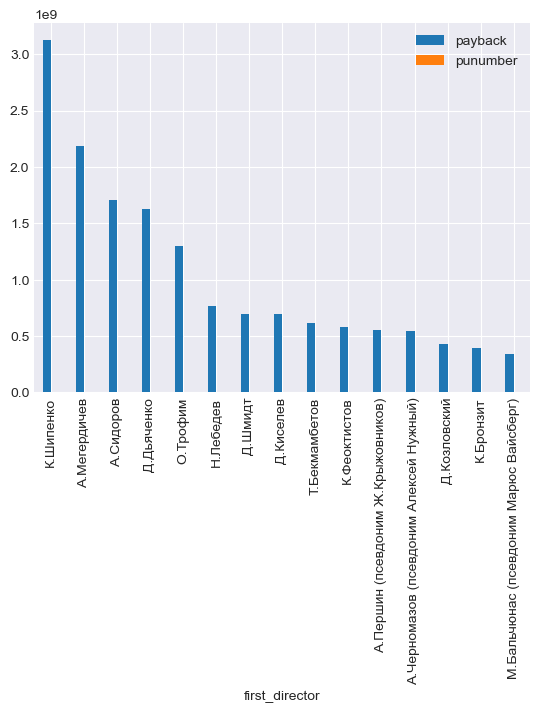

In [65]:
gos_fin_df_director_pivot_top_15 = (gos_fin_df.
                             pivot_table(index=['first_director'], aggfunc={'punumber':'count','payback':'sum'} ).
                             sort_values(by='payback',ascending=False).head(15)
                            )
# gos_fin_df_director_pivot
gos_fin_df_director_pivot_top_15.plot(kind='bar')

Самый прибыльный кинорежиссёр с господдержкой - Клим Шипенко, заработавший более 3млрд. Это, в основном за счёт хита "Холоп".
Затем идут Мегердичев, Сидоров, Дьяченко, Трофим. С прибыльностью от 2.25 до 1.35 млрд. рублей.

Теперь посмотрим самых антиприбыльных режиссёров

In [66]:
gos_fin_df_director_pivot_bot_15=(
    gos_fin_df.
    pivot_table(index=['first_director'], aggfunc={'punumber':'count','payback':'sum'} ).
    sort_values(by='payback').head(15)
)
gos_fin_df_director_pivot_bot_15

,payback,punumber
first_director,,
О.Степченко,-1.971477e+09,1
А.Михалков (псевдоним А.Кончаловский),-7.256988e+08,1
А.Учитель,-5.211304e+08,1
Н.Хомерики,-4.907581e+08,2
Р.Давлетьяров,-4.711673e+08,5
А.Мельник,-4.274217e+08,1
П.Лунгин,-4.141070e+08,2
И.Зайцев,-3.616637e+08,1
И.Евланникова,-3.546741e+08,1


<AxesSubplot:xlabel='first_director'>

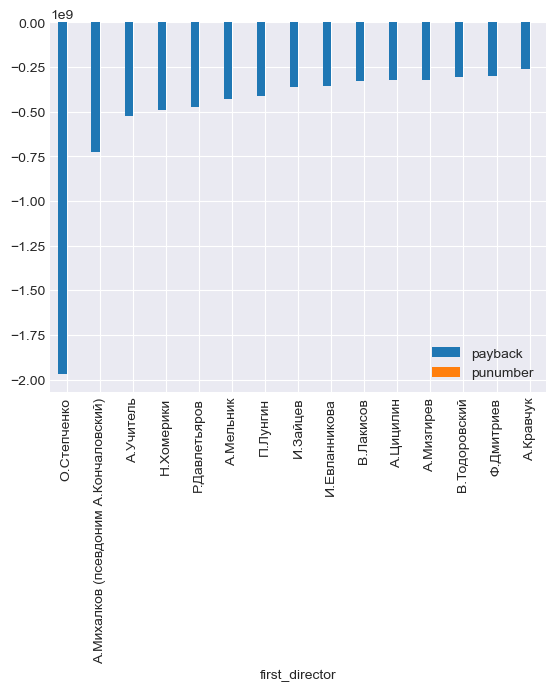

In [67]:
gos_fin_df_director_pivot_bot_15.plot(kind='bar')

Заслуженное первое (с конца, разумеется) место принадлежит Олегу Степченко - почти минус 2 млрд. Тут дело в дорогостоящем фильме "Тайна печати дракона", не снискавшем особой популярности среди зрителей. Затем идут А.Михалков, А.Учитель, Р. Давлетьяров, А.Мельник с убытками от 750  до 400 млн. рублей.

#### Студии

<AxesSubplot:xlabel='film_studio'>

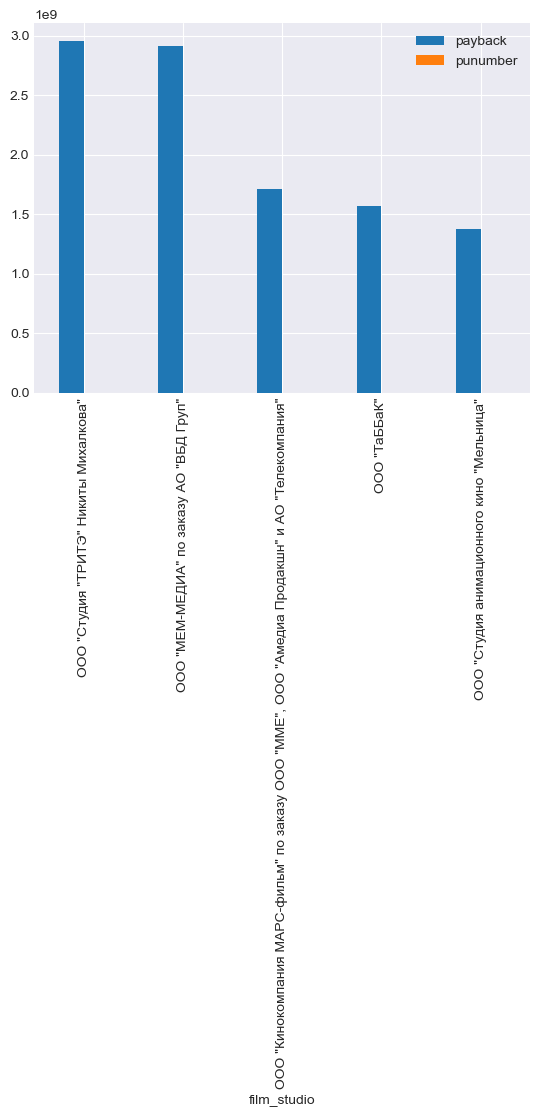

In [68]:
gos_fin_df_studio_pivot_top_5 = (gos_fin_df.
                             pivot_table(index='film_studio', aggfunc={'punumber':'count','payback':'sum'} ).
                             sort_values(by='payback',ascending=False).head(5)
                            )

gos_fin_df_studio_pivot_top_5.plot(kind='bar')

In [69]:
gos_fin_df_studio_pivot_top_5

,payback,punumber
film_studio,,
"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",2.956465e+09,2
"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",2.913569e+09,1
"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""ММЕ"", ООО ""Амедиа Продакшн"" и АО ""Телекомпания""",1.707969e+09,1
"ООО ""ТаББаК""",1.569995e+09,6
"ООО ""Студия анимационного кино ""Мельница""",1.377916e+09,7


Первое место по прибыльности занимает ООО "Студия "ТРИТЭ" единственного обладателя оскара среди художественного российского кинематографа - Никиты Михалкова: около 2.95 млрд. рублей.

За ним вслед идёт ООО "МЕМ-МЕДИА" по заказу АО "ВБД Груп" - 2.913 млрд рублей.

Так же можно выделить плодовитые студии по количеству картин - это ООО "Студия анимационного кино "Мельница - 7 картин, и 
ООО "Студия анимационного кино "Мельница - 6 картин, имеющих по 1.37 и 1.56 млрд. рублей прибыльности.

по традиции исследуем теперь самые антиприбыльные киностудии

<AxesSubplot:xlabel='film_studio'>

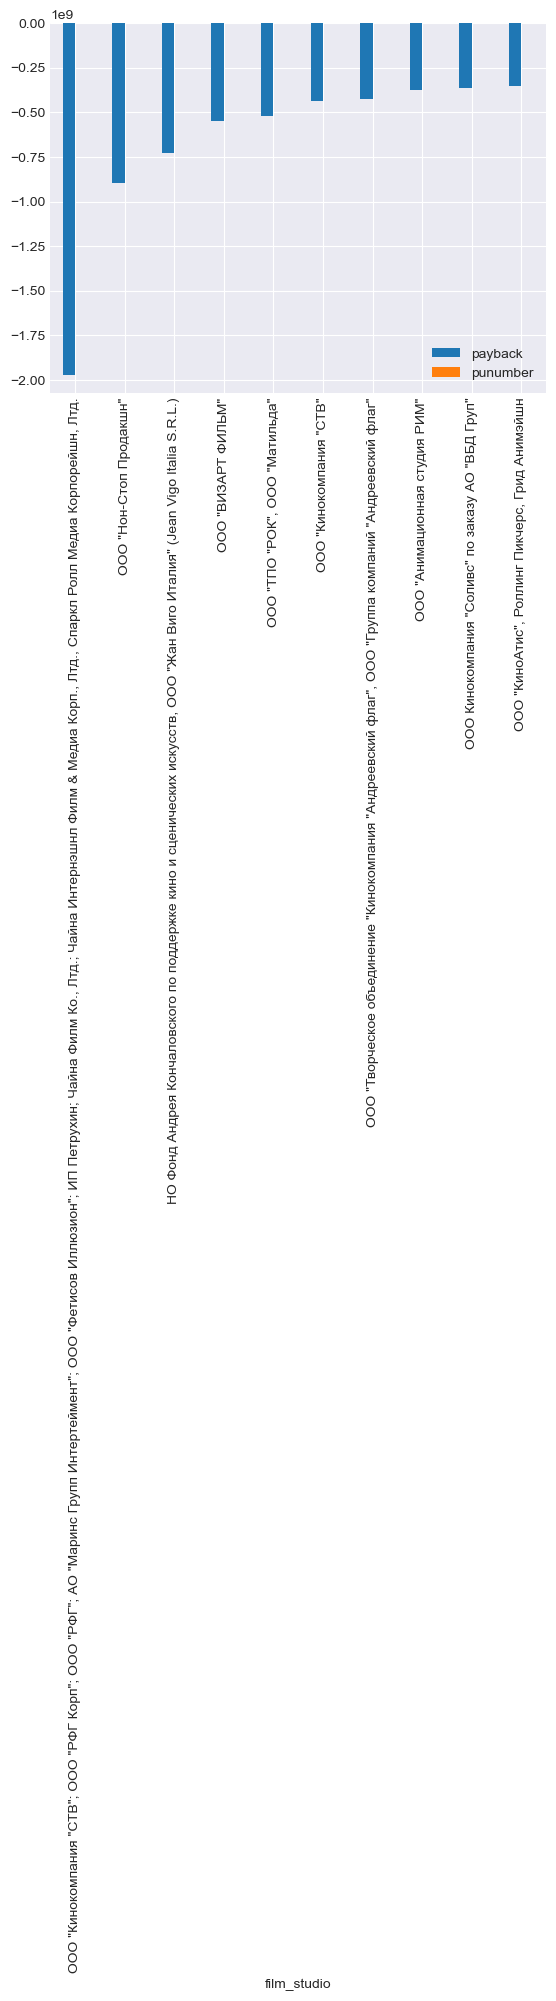

In [70]:
gos_fin_df_studio_pivot_bot_10=(
    gos_fin_df.
    pivot_table(index=['film_studio'], aggfunc={'punumber':'count','payback':'sum'} ).
    sort_values(by='payback').head(10)
)
gos_fin_df_studio_pivot_bot_10.plot(kind='bar')


In [71]:
gos_fin_df_studio_pivot_bot_10

,payback,punumber
film_studio,,
"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""РФГ""; АО ""Маринс Групп Интертеймент""; ООО ""Фетисов Иллюзион""; ИП Петрухин; Чайна Филм Ко., Лтд.; Чайна Интернэшнл Филм & Медиа Корп., Лтд., Спаркл Ролл Медиа Корпорейшн, Лтд.",-1.971477e+09,1
"ООО ""Нон-Стоп Продакшн""",-8.969120e+08,3
"НО Фонд Андрея Кончаловского по поддержке кино и сценических искусств, ООО ""Жан Виго Италия"" (Jean Vigo Italia S.R.L.)",-7.256988e+08,1
"ООО ""ВИЗАРТ ФИЛЬМ""",-5.492090e+08,4
"ООО ""ТПО ""РОК"", ООО ""Матильда""",-5.211304e+08,1
"ООО ""Кинокомпания ""СТВ""",-4.396027e+08,6
"ООО ""Творческое объединение ""Кинокомпания ""Андреевский флаг"", ООО ""Группа компаний ""Андреевский флаг""",-4.274217e+08,1
"ООО ""Анимационная студия РИМ""",-3.734883e+08,2
"ООО Кинокомпания ""Соливс"" по заказу АО ""ВБД Груп""",-3.616637e+08,1


Первое место на антипьедестале с отрывом заняла группа студий ООО "Кинокомпания "СТВ"; ООО "РФГ Корп"; ООО "РФГ"; АО "Маринс Групп Интертеймент"; ООО "Фетисов Иллюзион"; ИП Петрухин; Чайна Филм Ко., Лтд.; Чайна Интернэшнл Филм & Медиа Корп., Лтд., Спаркл Ролл Медиа Корпорейшн, Лтд. с прибыльностью минус 1.971 млрд. рублей. Студий много, значит и потери делятся на всех. Зато не так обидно:).

Второе - ООО "Нон-Стоп Продакшн" -  минус 896 млн. рублей. Но и студия одна, в отличие от предыдущего. 

Также можно выделить ООО "Кинокомпанию "СТВ", имеющую аж 6 кинокартин. Упорные ребята

Видимо кто-то не получил годовых премий, да и инвесторы расстроились)

#### Жанры

Не зря же был выделен основной жанр. Тут мне даже самому интересно. Посмотрим какие жанры чаще спонсируются государством и какие прибыльные

<AxesSubplot:xlabel='first_genre'>

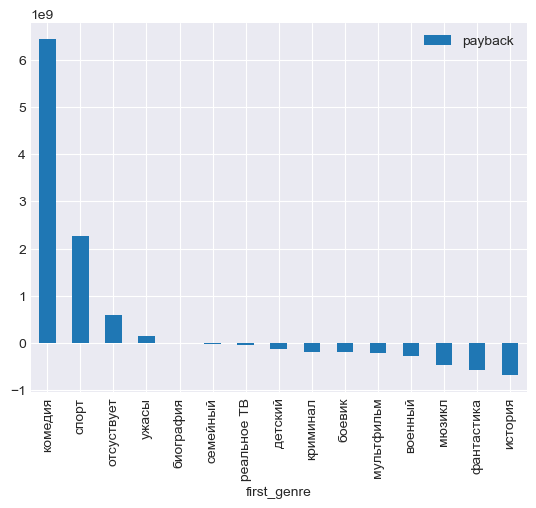

In [72]:
gos_fin_df_genre_pivot_top_15 = (gos_fin_df.
                             pivot_table(index='first_genre', aggfunc={'payback':'sum'} ).
                             sort_values(by='payback',ascending=False).head(15)
                            )

gos_fin_df_genre_pivot_top_15.plot(kind='bar')

Лучше всего окупается жанр "Комедия", причём с заметным отрывом. За ним идёт жанр "Спорт".
Хуже всего окупаются исторические, фантастические, мюзиклы и военные фильмы. Бессердечная статистика. Моих любимых драм в списке нет:)

<AxesSubplot:xlabel='first_genre'>

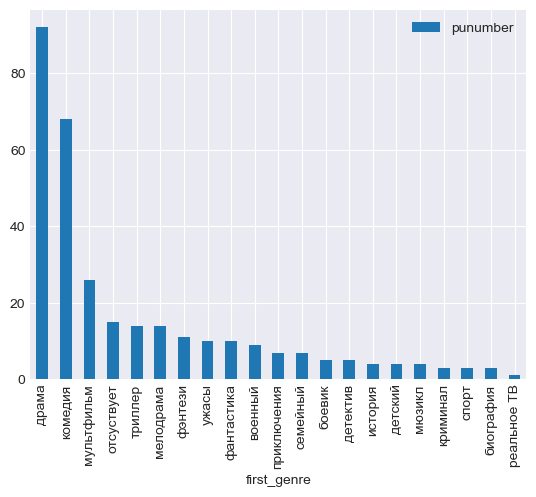

In [73]:
gos_fin_df_genre_pivot_сount = (gos_fin_df.
                             pivot_table(index='first_genre', aggfunc={'punumber':'count'} ).
                             sort_values(by='punumber',ascending=False)
                            )
gos_fin_df_genre_pivot_сount.plot(kind='bar')

Видим что чаще всего спонсируются драмы, но с окупаемостью у них не самая лучшая ситуация, но и не самая плохая. Комедии на втором месте, но с окупаемостью у них хорошая статистика.

Так же можно выделить жанр спорт, который хорош по окупаемости, несмотря на малое количество фильмов с господдержкой.

### Шаг 5. Общий вывод

Для обработки соединены данные о прокатных удостоверениях и  данные о прокате в российских кинотеатрах.

Проведена предобработка, НЕ убраны дубликаты чтобы оставить только прокатные фильмы из общей массы чтобы не потерять, обнаружено множество фильмов с аномально малыми кассовыми сборами, эти данные не будут учитываться в дальнейшем. 

Для анализа по кассовым сборам подходят данные с 2015 года.

Суммарно больше всех собрали фильмы с категорией 16+, за ними следует категория 12+, затем 6+. 
А к началу 2019 года сборы у категорий 6+, даже превысили сборы у категории 16+, а у фильмов с категорией 16+ сравнялись с категорией 16+. Фильмы с категорией 18+ в 2018 году даже обошли другие категории, но в среднем они зарабатывают меньше.
Так же заметно общее падение  суммы сборов у всех категорий в 2017, связанное с кинокризисом. Скорее всего-это начало расцвета онлайн-кинотеатеров.

В 2017 были максимальные кассовые сборы, хотя и фильмов вышло меньше. 2019 год по сумме сборов практически равен 2017 году.
в 2015 были минимальные кассовые сборы. На суммарные кассовые сборы сильно влияют хиты с большими кассовыми сборами. Странно конечно, хоть и был кризис в киноиндустрии в 2017 году

Проведен анализ по среднему и медианному сборам в прокате фильмов
медиана заметно ниже средней, что более верно характеризует средний заработок в прокатах. можно сказать что средний заработок фильм в прокате - от 7.8 до 14 млн рублей, а медианный  от 1 до 6 млн рублей

В результаты исследования видно что в среднем сумма господдержки в году составляет около 350 млн рублей в год.

видно что фильмы с долей с господдержки от 0.05 до 0.7 имеют рейтинг от 4 до 8, а после 0.7 рейтинг фильмов уже падает до нуля. Видимо для такого спонсорского кино уже не важен рейтинг и особого коммерческого интереса в этом плане нет. Главное чтобы фильм был снят и вышел

видим, что окупилось всего 66 фильмов с господдержкой, а 246 не окупилось. то есть процент окупаемости в общем - около 21%.  так же видно у фильмов с господдержкой была положительная окупаемость в 2017 и 2018 годах.

#### Дополнения к общему выводу

##### Режиссеры

Самый прибыльный кинорежиссёр с господдержкой - Клим Шипенко, заработавший более 3млрд. Это, в основном за счёт хита "Холоп".
Затем идут Мегердичев, Сидоров, Дьяченко, Трофим. С прибыльностью от 2.25 до 1.35 млрд. рублей.

Заслуженное первое (с конца, разумеется) место принадлежит Олегу Степченко - почти минус 2 млрд. Тут дело в дорогостоящем фильме "Тайна печати дракона", не снискавшем особой популярности среди зрителей. Затем идут А.Михалков, А.Учитель, Р. Давлетьяров, А.Мельник с убытками от 750  до 400 млн. рублей.

##### Киностудии

Первое место по прибыльности занимает ООО "Студия "ТРИТЭ" единственного обладателя оскара среди художественного российского кинематографа - Никиты Михалкова: около 2.95 млрд. рублей.
За ним вслед идёт ООО "МЕМ-МЕДИА" по заказу АО "ВБД Груп" - 2.913 млрд рублей.

Так же можно выделить плодовитые студии по количеству прибыльных картин - это ООО "Студия анимационного кино "Мельница - 7 картин, и 
ООО "Студия анимационного кино "Мельница - 6 картин, имеющих по 1.37 и 1.56 млрд. рублей прибыльности.


Первое место на антипьедестале с отрывом заняла группа студий ООО "Кинокомпания "СТВ"; ООО "РФГ Корп"; ООО "РФГ"; АО "Маринс Групп Интертеймент"; ООО "Фетисов Иллюзион"; ИП Петрухин; Чайна Филм Ко., Лтд.; Чайна Интернэшнл Филм & Медиа Корп., Лтд., Спаркл Ролл Медиа Корпорейшн, Лтд. с прибыльностью минус 1.971 млрд. рублей. Студий много, значит и потери делятся на всех. Зато не так обидно.

Второе - ООО "Нон-Стоп Продакшн" -  минус 896 млн. рублей. Но и студия одна, в отличие от предыдущего. 

Также можно выделить ООО "Кинокомпанию "СТВ", имеющую аж 6 кинокартин. Упорные ребята, которые не сдаются.



##### Жанры

Лучше всего окупается жанр "Комедия", причём с заметным отрывом. За ним идёт жанр "Спорт".
Хуже всего окупаются исторические, фантастические, мюзиклы и военные фильмы.

Чаще всего спонсируются драмы, но с окупаемостью у них не самая лучшая ситуация, но и не самая плохая. Комедии на втором месте, но с окупаемостью у них хорошая статистика.

Так же можно выделить жанр спорт, который хорош по окупаемости, несмотря на малое количество фильмов с господдержкой.